In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
device = 'cuda'
from fastai2.vision.all import *
print('pytorch:', torch.__version__)

pytorch: 1.4.0


In [3]:
X_train = 10*torch.rand((300,3)).cuda()
ttargets = X_train.sum(dim=1)
ttargets += torch.rand_like(ttargets)

In [4]:
X_valid = torch.rand((60,3)).cuda()
vtargets = X_valid.sum(dim=1)
vtargets += torch.rand_like(vtargets)

In [5]:
# Using PyTorch DataSets, as mentioned in
# https://dev.fast.ai/learner#PyTorch-interrop

In [6]:
from torch.utils.data import TensorDataset
trainDS = TensorDataset(X_train,ttargets)  #PyTorch utility for handling this exact situation.
validDS = TensorDataset(X_valid,vtargets)

# Learner.summary(), three steps down, fails because the original DataSets do not contain n_inp.
# I do not know the meaning or purpose of n_inp. Here I set it to 1 in order to get
# past the error.
trainDS.n_inp = 1
validDS.n_inp = 1

In [7]:
# from torch.utils.data import DataLoader
# Here using the fastai2 DataLoader, not the PyTorch DataLoader of the same name.
# I tried the PyTorch DataLoader. but it is missing many functions that fastai uses, for example to() and one_batch().
batch_size = 27
trainDL = DataLoader(trainDS, batch_size=batch_size, drop_last=False)
validDL = DataLoader(validDS, batch_size=batch_size, drop_last=False)

dls = DataLoaders(trainDL, validDL)

In [8]:
trainModel = nn.Linear(3,1).cuda()
learn = Learner(dls, trainModel, loss_func=MSELossFlat(), cbs=ShowGraphCallback())
learn.summary()

Linear (Input shape: ['27 x 3'])
Layer (type)         Output Shape         Param #    Trainable 
Linear               27 x 1               4          True      
________________________________________________________________

Total params: 4
Total trainable params: 4
Total non-trainable params: 0

Optimizer used: <function Adam at 0x7f456d47a290>
Loss function: FlattenedLoss of MSELoss()

Callbacks:
  - TrainEvalCallback
  - Recorder
  - ProgressCallback
  - ShowGraphCallback

In [9]:
learn.unfreeze()

In [10]:
# The following sequence causes an error.
# It is necessary to train, do lr_find, and train again to cause it.
# When SGD is substituted for Adam, the error disappears.
# All inputs and the model are in the GPU.

SuggestedLRs(lr_min=0.33113112449646, lr_steep=0.14454397559165955)

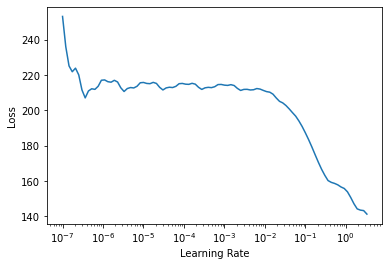

In [11]:
learn.lr_find()

epoch,train_loss,valid_loss,time
0,170.819717,2.252820,00:00
1,88.682266,0.137229,00:00
2,54.936638,0.115945,00:00
3,36.952240,0.116263,00:00
4,26.331553,0.121096,00:00


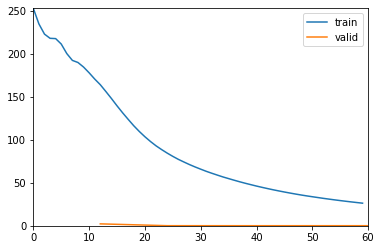

In [12]:
learn.fit_one_cycle(5, 1e-1)

SuggestedLRs(lr_min=0.10964782238006592, lr_steep=6.309573450380412e-07)

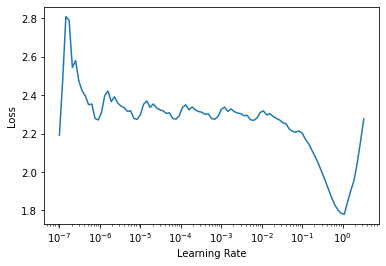

In [13]:
learn.lr_find()

In [14]:
learn.fit_one_cycle(5, 1e-1)

IndexError: list index out of range